In [1]:
print("HelloWorld")

HelloWorld


In [2]:
from core.worm import BasicCrawler
from rdflib import Graph, Literal, RDF, URIRef, Namespace
from rdflib.namespace import FOAF, XSD

In [3]:
target = "https://programsandcourses.anu.edu.au/2025/course/COMP4820"
crawler = BasicCrawler(target, max_depth=2)
crawler.crawl()

Crawling: https://programsandcourses.anu.edu.au/2025/course/COMP4820 (Depth: 0)
Inherent Requirements: Not applicable
Requisite Courses:
COMP2100 (/2025/course/COMP2100)
COMP2120 (/2025/course/COMP2120)
COMP4500 (/2025/course/COMP4500)
COMP4550 (/2025/course/COMP4550)
COMP4560 (/2025/course/COMP4560)
COMP4810 (/2025/course/COMP4810)
INFO:rawling prequsite course url:https://programsandcourses.anu.edu.au/2025/course/COMP2100
Crawling: https://programsandcourses.anu.edu.au/2025/course/COMP2100 (Depth: 1)
Inherent Requirements: None
Requisite Courses:
COMP1110 (/2025/course/COMP1110)
COMP1140 (/2025/course/COMP1140)
COMP2500 (/2025/course/COMP2500)
COMP6442 (/2025/course/COMP6442)
INFO:rawling prequsite course url:https://programsandcourses.anu.edu.au/2025/course/COMP1110
Crawling: https://programsandcourses.anu.edu.au/2025/course/COMP1110 (Depth: 2)
Inherent Requirements: None
Requisite Courses:
COMP1100 (/2025/course/COMP1100)
COMP1130 (/2025/course/COMP1130)
COMP1730 (/2025/course/COMP

In [4]:
for elem in crawler.crawled_courses:
    print(elem.course_code)

# not we try to connect them based on the course code in the course and course conde in rpequsite
course_list = crawler.crawled_courses
for elem in course_list:
    for preq_code in elem.prequisites:
        for course in course_list:
            if course.course_code == preq_code:
                elem.prequiste_course[preq_code] = course
                break

COMP4820
COMP2100
COMP1110
COMP1140
COMP6442
COMP2120
COMP2130
COMP6120
COMP6311
COMP4500
COMP3500
COMP4540
COMP4810
COMP4550
COMP4560


In [5]:
import pprint
for elem in course_list:
    pprint.pprint(elem.prequiste_course)
    print("*"*50)

{'COMP2100': <core.course.Course object at 0x000002488E65ECD0>,
 'COMP2120': <core.course.Course object at 0x000002488E728290>,
 'COMP4500': <core.course.Course object at 0x000002488EB88090>,
 'COMP4550': <core.course.Course object at 0x000002488EC0F190>,
 'COMP4560': <core.course.Course object at 0x000002488EC0DE90>,
 'COMP4810': <core.course.Course object at 0x000002488ECCB310>}
**************************************************
{'COMP1110': <core.course.Course object at 0x000002488E742390>,
 'COMP1140': <core.course.Course object at 0x000002488E768D50>,
 'COMP6442': <core.course.Course object at 0x000002488E7E3A50>}
**************************************************
{'COMP1140': <core.course.Course object at 0x000002488E768D50>}
**************************************************
{'COMP1110': <core.course.Course object at 0x000002488E742390>}
**************************************************
{'COMP1110': <core.course.Course object at 0x000002488E742390>,
 'COMP1140': <core.course.Co

In [6]:
import matplotlib.pyplot as plt

def merge_course_to_graph(course_list):
    graph = Graph()
    for course in course_list:
            triples = course.to_rdf()
            for triple in triples:
                graph.add(triple)
    return graph

graph = merge_course_to_graph(course_list)

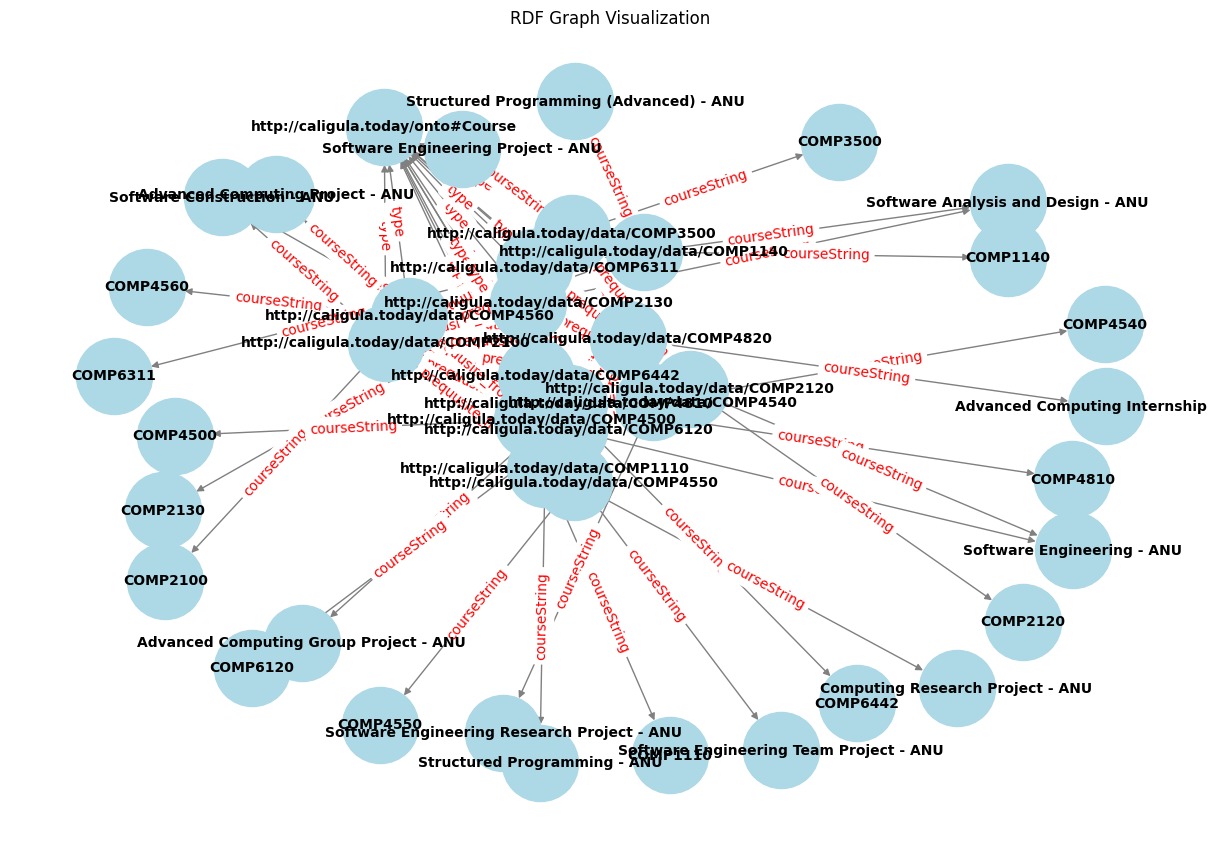

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from rdflib import Graph

def plot_rdf_graph(rdf_graph):
    """
    Plots an RDF graph using NetworkX and Matplotlib.

    Parameters:
    - rdf_graph: An rdflib.Graph object containing the RDF data.
    """
    # Create a directed graph from RDF data
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for s, p, o in rdf_graph:
        G.add_node(s)
        G.add_node(o)
        G.add_edge(s, o, label=p)

    # Set up the plot
    plt.figure(figsize=(12, 8))

    # Layout for the graph
    pos = nx.spring_layout(G, seed=42)  # You can change the layout algorithm here

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")

    # Draw edge labels
    edge_labels = {(s, o): p.split('#')[-1] for s, p, o in rdf_graph}  # Simplify predicate labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Show the plot
    plt.title("RDF Graph Visualization")
    plt.show()

plot_rdf_graph(graph)